# 全球

全球底图布局 (`cedarkit.maps.domains.GlobalMapTemplate`) 绘制全球范围图形，使用简易圆柱投影 (`cartopy.crs.PlateCarree`)，默认中心经度东经 80 度。
默认使用 Cartopy 的底图，并填充陆地颜色。

## 准备

导入需要的包

In [1]:
import pandas as pd
import numpy as np

from cedarkit.maps.chart import Panel
from cedarkit.maps.domains import GlobalMapTemplate
from cedarkit.maps.map import set_default_map_loader_package
from cedarkit.maps.style import ContourStyle, ColorbarStyle
from cedarkit.maps.colormap import get_ncl_colormap

设置使用 CEMC 地图包

In [2]:
set_default_map_loader_package("cedarkit.maps.map.cemc")

'cedarkit.maps.map.cemc'

定义绘图样式

In [3]:
t_contour_lev = np.arange(-80, 60 + 4, 4)
colormap = get_ncl_colormap(
    "temp_19lev", count=len(t_contour_lev) + 1, spread_start=0, spread_end=17)
t_style = ContourStyle(
    colors=colormap,
    levels=t_contour_lev,
    fill=True,
    colorbar_style=ColorbarStyle(
        label_levels=t_contour_lev[::2]
    )
)

## 绘制

绘制底图布局

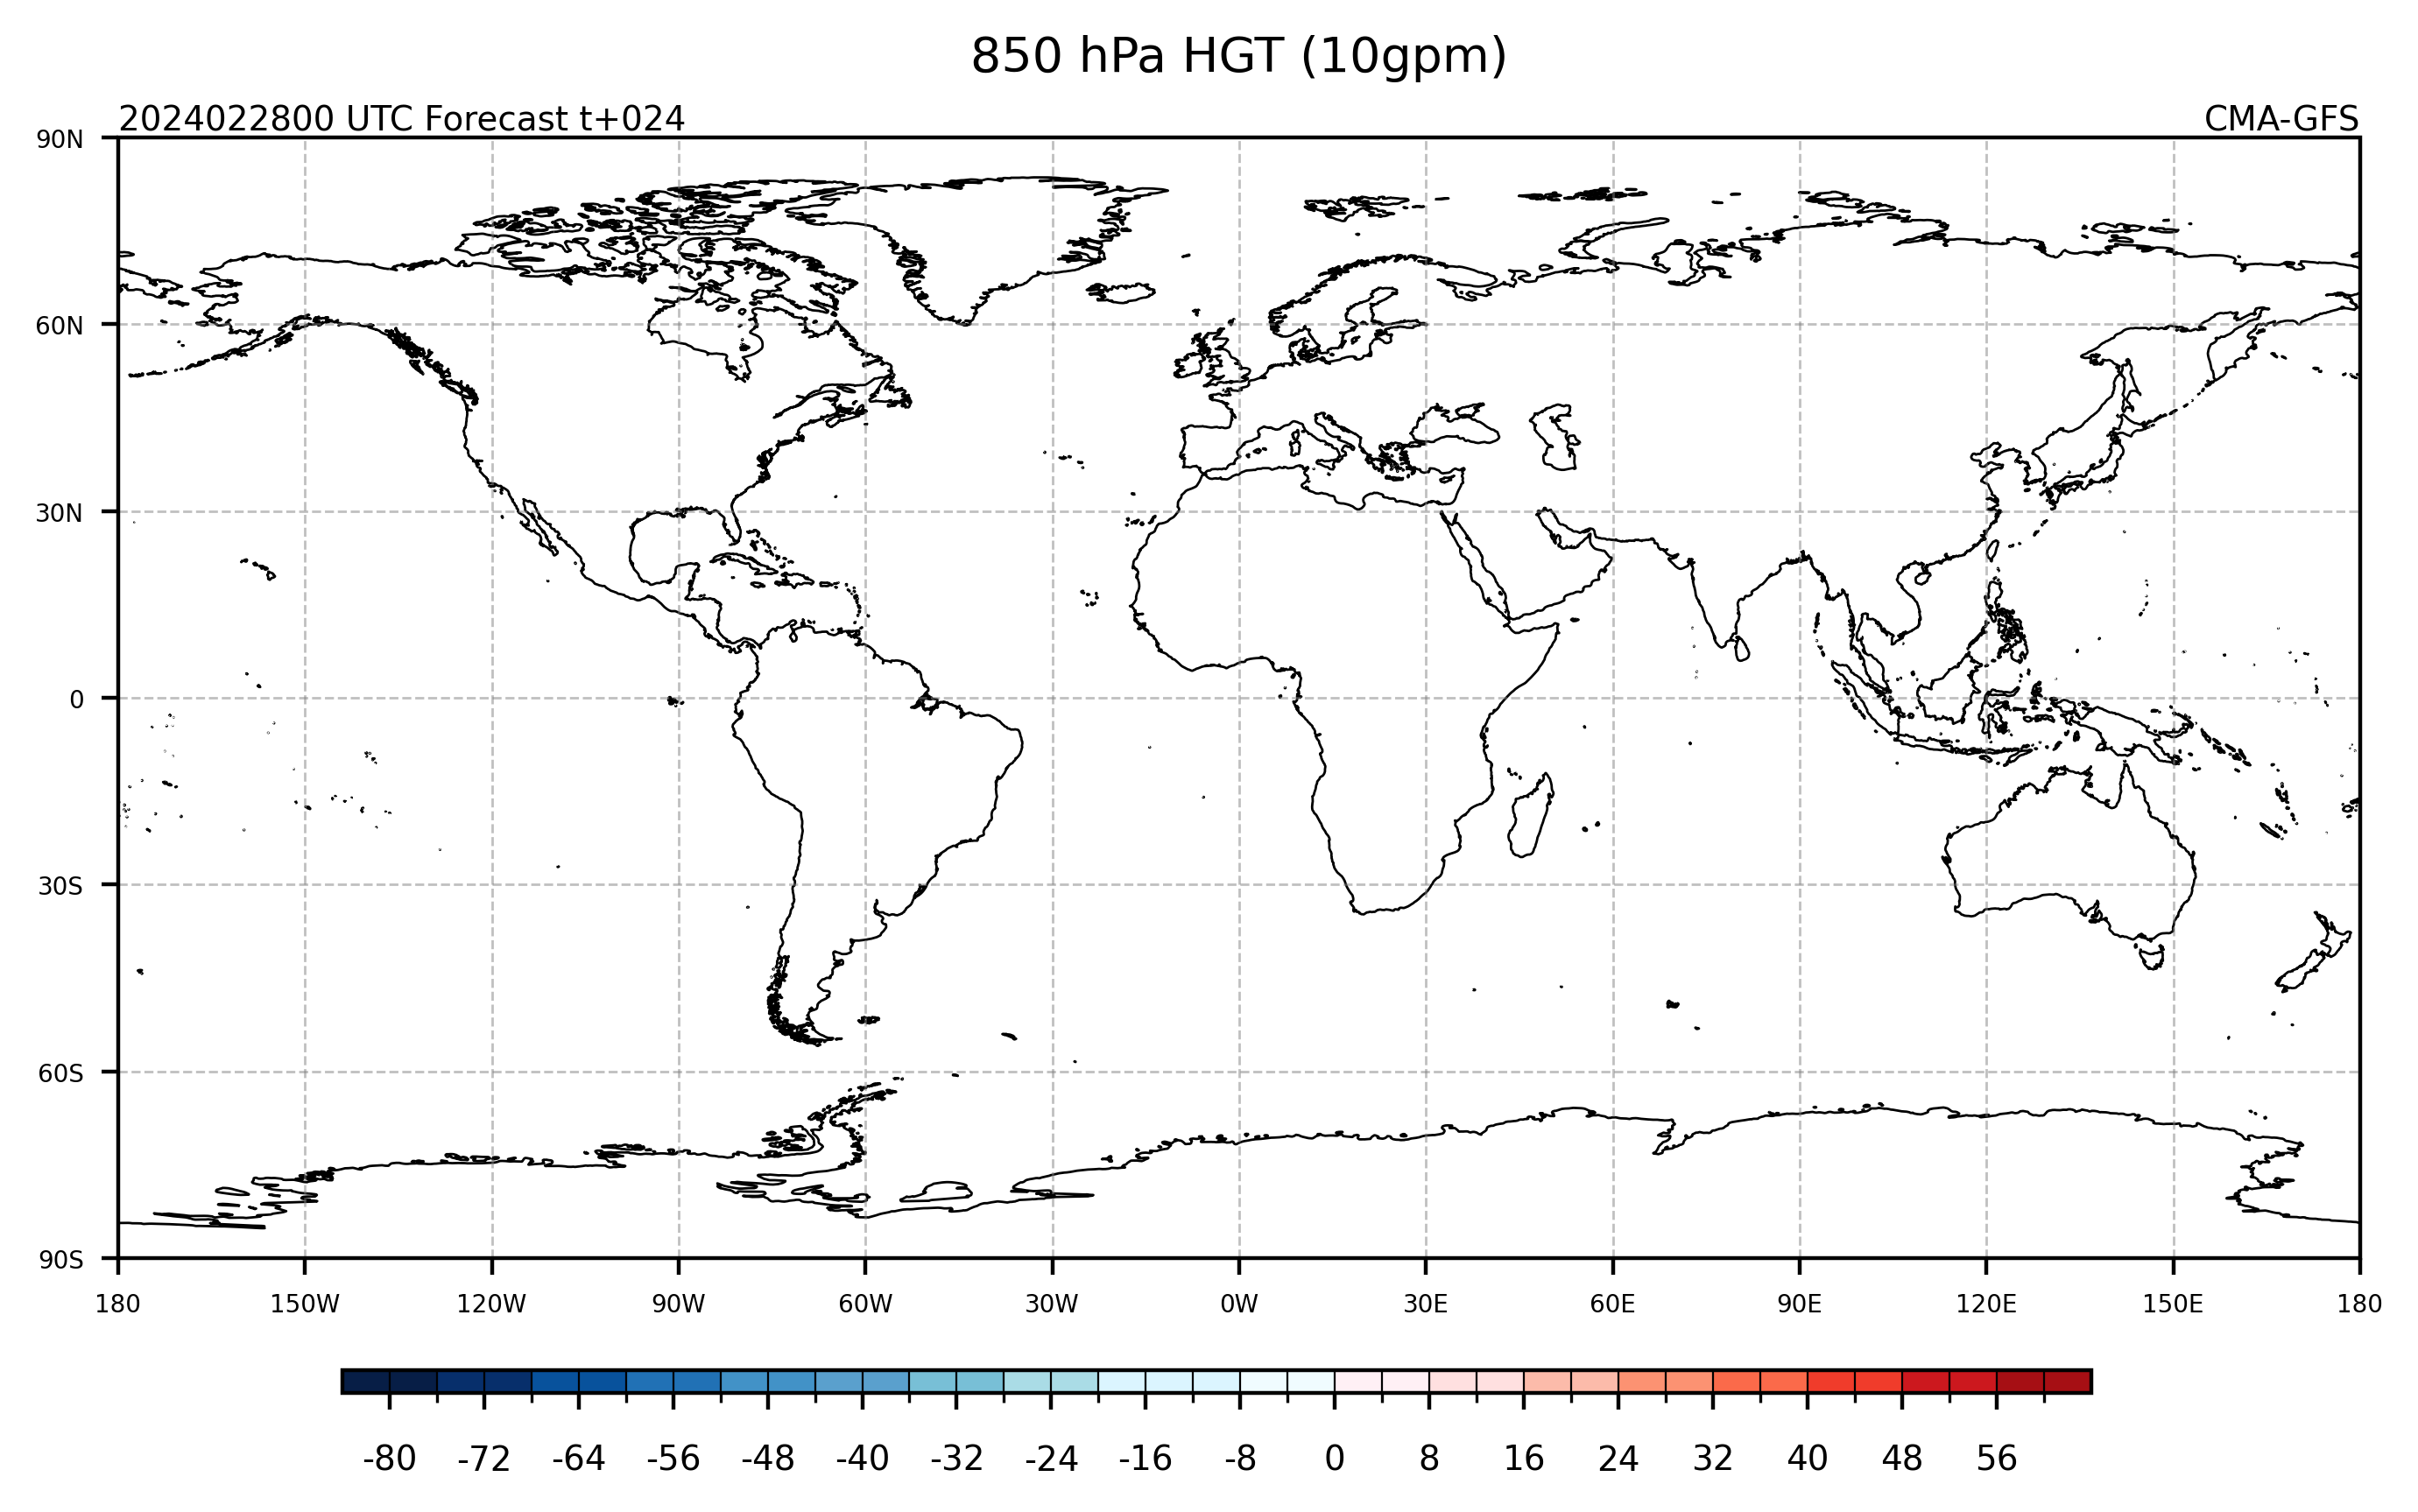

In [4]:
domain = GlobalMapTemplate()
panel = Panel(domain=domain)

domain.set_title(
    panel=panel,
    graph_name="850 hPa HGT (10gpm)",
    system_name="CMA-GFS",
    start_time=pd.to_datetime("2024-02-28 00:00"),
    forecast_time=pd.Timedelta(hours=24),
)
domain.add_colorbar(panel, style=t_style)

panel.show()